In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls

In [ ]:
! ls

In [ ]:
# change directories to data
%cd "/content/gdrive/My Drive/Colab Notebooks/pdd"

/content/gdrive/My Drive/Colab Notebooks/pdd


In [ ]:
! ls

embeddings.csv	embed_new.csv  metadata.csv  meta_new.csv  Untitled3.ipynb


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # ignorewarning in seaborn

In [ ]:
embed = pd.read_csv('embeddings.csv')
meta = pd.read_csv('metadata.csv')

In [ ]:
df_meta_unique = pd.merge(meta.nunique(dropna=False).to_frame(name='Including NaN'),
                                   meta.nunique(dropna=True).to_frame(name='Excluding NaN'),
                                   left_index=True,
                              right_index=True)
df_meta_unique['NaN existed'] = df_meta_unique['Including NaN'] - df_meta_unique['Excluding NaN']
df_meta_unique

,Including NaN,Excluding NaN,NaN existed
site_id,305520,305520,0
well_id,76380,76380,0
cell_type,2,2,0
experiment,4,4,0
plate,27,27,0
well,1340,1340,0
site,4,4,0
disease_condition,4,3,1
treatment,1671,1670,1
treatment_conc,15,14,1


In [ ]:
embed.info()
embed.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305520 entries, 0 to 305519
Columns: 1025 entries, site_id to feature_1023
dtypes: float64(1024), object(1)
memory usage: 2.3+ GB


,0
site_id,0
feature_0,0
feature_1,0
feature_2,0
feature_3,0
...,...
feature_1019,0
feature_1020,0
feature_1021,0
feature_1022,0


In [ ]:
print(meta['experiment'].value_counts())
print(meta['cell_type'].value_counts())
print(meta['disease_condition'].value_counts())
print(meta['treatment'].value_counts())
print(meta['treatment_conc'].value_counts())

experiment
HRCE-2    144720
HRCE-1    139360
VERO-1     10720
VERO-2     10720
Name: count, dtype: int64
cell_type
HRCE    284080
VERO     21440
Name: count, dtype: int64
disease_condition
Active SARS-CoV-2            280376
Mock                           9120
UV Inactivated SARS-CoV-2      9120
Name: count, dtype: int64
treatment
Ritonavir                    864
Cobicistat                   864
Imiquimod                    864
Arbidol                      864
1-deoxygalactonojirimycin    864
                            ... 
paricalcitol                 144
Phloretin                    144
Alibendol                    144
Econazole                    144
trilostane                   144
Name: count, Length: 1670, dtype: int64
treatment_conc
0.100      42732
1.000      42708
0.030      42660
0.300      42660
3.000      42636
0.010      42556
10.000      3396
0.003       3244
30.000       176
100.000      176
2.500         72
0.250         72
0.025         72
0.001         24
Name: count

Karena datasetnya nggak balance diapain yah,,, opsi :
1. Undersampling. Merupakan teknik untuk menurunkan jumlah majority class sebanyak jumlah minority class. Beberapa metode yang termasuk dalam undersampling yaitu random under-sampling, modifikasi dari metode NearestNeighbor, dll.
2. Oversampling. Merupakan teknik untuk meningkatkan jumlah minority class sebanyak jumlah majority class. Beberapa metode yang termasuk dalam oversampling yaitu Naive random over-sampling, ADASYN, SMOTE, dll

yaudah oversampling dulu

In [ ]:
# do oversampling of the meta data
df_active = meta[meta['disease_condition']=='Active SARS-CoV-2']
df_active2 = df_active.sample(n=9120, random_state=42)
df_uv = meta[meta['disease_condition']=='UV Inactivated SARS-CoV-2']
df_mock = meta[meta['disease_condition']=='Mock']

meta_new = pd.concat([df_active2, df_uv, df_mock])
meta_new.head()

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc
235462,HRCE-1_1_J31_4,HRCE-1_1_J31,HRCE,HRCE-1,1,J31,4,Active SARS-CoV-2,Epalrestat,1.00
246283,HRCE-1_12_V27_4,HRCE-1_12_V27,HRCE,HRCE-1,12,V27,4,Active SARS-CoV-2,Tolazamide,0.03
136005,HRCE-2_22_Z27_2,HRCE-2_22_Z27,HRCE,HRCE-2,22,Z27,2,Active SARS-CoV-2,inimur,0.10
198561,HRCE-2_19_AB23_3,HRCE-2_19_AB23,HRCE,HRCE-2,19,AB23,3,Active SARS-CoV-2,chloroxoquinoline,0.10
132858,HRCE-2_14_D28_2,HRCE-2_14_D28,HRCE,HRCE-2,14,D28,2,Active SARS-CoV-2,Triacetin,1.00


In [ ]:
meta_new.shape

(27360, 10)

In [ ]:
# save processed meta subset
meta_new.to_csv('meta_new.csv', index=False)

In [ ]:
embed_new = embed[embed['site_id'].isin(meta_new['site_id'])]
embed_new.shape

(27360, 1025)

In [ ]:
embed_new.to_csv('embed_new.csv', index=False)

### DIMENSIONAL REDUCTION

since the embeddings file has too many column, we need to do dimensional reduction

Can be done with:
- PCA
- Missing Value Ratio
- SVD


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
embed.set_index('site_id', inplace=True)
# standardize the embedding feature
scaler = StandardScaler()
x = scaler.fit_transform(embed)

In [ ]:
pca = PCA(n_components=60)

x_pca = pca.fit_transform(x)

In [ ]:
# cek dah oke ato belom n-nya
print(sum(pca.explained_variance_ratio_))


0.8948876067721226


Text(0, 0.5, 'cumulative explained variance')

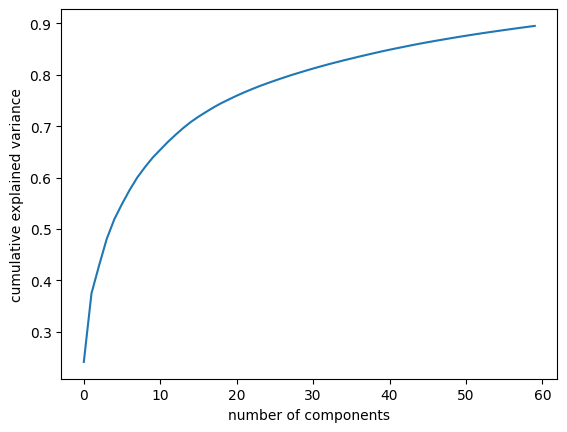

In [ ]:
# plot
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance')

In [ ]:
# projects original data x to the principal components using PCA
principal_comp = pca.transform(x) # ini representasi data yang baru di reduced PCA space

In [ ]:
principal_comp.shapen

(305520, 60)

Normalize data with MinMaxScaler function from library. It'll turn the data into range [0, 1]

In [ ]:
scale_0_1 = MinMaxScaler()
principal_comp = scale_0_1.fit_transform(principal_comp)

In [ ]:
# save the PCA data into file
np.savez_compressed('pca_data.npz', pca=principal_comp)